In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# 데이터 로드 및 전처리
df = pd.read_csv('../data/거제도.csv', encoding='cp949')
df=df.set_index(pd.to_datetime(df.일시))
df = df[['평균 수온(°C)']]

df.loc[df['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan

df = df.dropna()
df

,평균 수온(°C)
일시,
2003-01-01,15.9
2003-01-02,16.6
2003-01-03,16.9
2003-01-04,16.7
2003-01-05,15.8
...,...
2022-12-27,15.7
2022-12-28,15.3
2022-12-29,15.0


In [3]:
df.isnull().sum()

평균 수온(°C)    0
dtype: int64

c:\Users\admin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


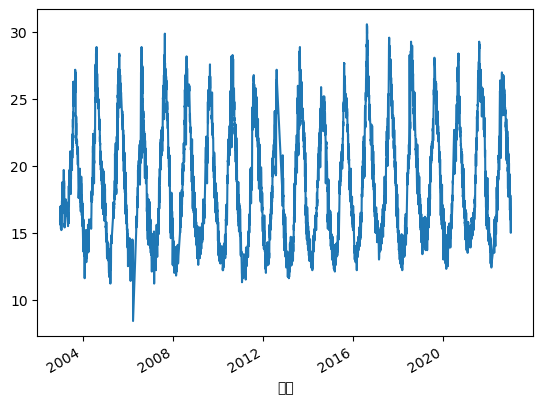

In [4]:
pig=df['평균 수온(°C)'].plot()

In [5]:
# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30  # 시퀀스 길이 설정
X, y = create_sequences(scaled_data, sequence_length)

# 훈련 데이터와 검증 데이터 분할
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))

In [6]:

# 모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
171/171 [==============================] - 4s 11ms/step - loss: 0.0115 - val_loss: 0.0021
Epoch 2/50
171/171 [==============================] - 2s 9ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/50
171/171 [==============================] - 2s 9ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 5/50
171/171 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.001

In [7]:
# 2023년 1월 1일부터 2023년 1월 31일까지의 예측
future_dates = pd.date_range(start='2023-01-01', end='2023-01-31', freq='D')
future_dates = np.array(future_dates)

# 입력 데이터의 형식 변환
input_data = df['평균 수온(°C)'].values
input_data = input_data.reshape(-1, 1)
input_data = scaler.transform(input_data)

# 마지막 30일 데이터를 이용하여 다음 31일 예측
last_30_days = input_data[-30:]
X_pred, y_true = create_sequences(last_30_days, 30)
y_pred = model.predict(X_pred)

# 예측 결과 디스켓 정규화 복원
y_pred = scaler.inverse_transform(y_pred)

# 예측 결과 출력
predicted_data = pd.DataFrame(y_pred, index=future_dates, columns=['평균 수온(°C) 예측'])
print(predicted_data)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 로드 및 전처리
df = pd.read_csv('../data/거제도.csv', encoding='cp949')
df = df.set_index(pd.to_datetime(df['일시']))
df = df[['평균 수온(°C)']]

df.loc[df['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
df = df.dropna()

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 30  # 시퀀스 길이 설정
X, y = create_sequences(scaled_data, sequence_length)

# 훈련 데이터와 검증 데이터 분할
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
171/171 [==============================] - 3s 11ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 2/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
171/171 [==============================] - 2s 9ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
171/171 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 5/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
171/171 [==============================] - 2s 9ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/50
171/171 [==============================] - 1s 8ms/step - loss: 0.0013 - val_loss: 0.001

In [11]:

# 2023년 1월 1일부터 2023년 1월 31일까지의 예측
future_dates = pd.date_range(start='2023-01-01', end='2023-01-31', freq='D')
future_dates = np.array(future_dates)

# 입력 데이터의 형식 변환
input_data = df['평균 수온(°C)'].values
input_data = input_data.reshape(-1, 1)
input_data = scaler.transform(input_data)

# 마지막 30일 데이터를 이용하여 다음 31일 예측
last_30_days = input_data[-30:].reshape(1, sequence_length, 1)
y_pred = model.predict(last_30_days)

# 예측 결과 디스켓 정규화 복원
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.flatten()

# 예측 결과 출력
predicted_data = pd.DataFrame(y_pred, index=future_dates, columns=['평균 수온(°C) 예측'])
print(predicted_data)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 316ms/step


ValueError: Shape of passed values is (1, 1), indices imply (31, 1)